In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/

 Cell_Phones_Sampled.csv  'Colab Notebooks'   Photos  'Ruchi '	'tsystems certificate.pdf'


In [5]:
dataset_path = '/content/drive/MyDrive/Cell_Phones_Sampled.csv'


In [6]:
df = pd.read_csv(dataset_path)

In [7]:
df.head()

,_id,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
0,{'$oid': '5a1321d5741a2384e802da06'},A3C8BQSTEC6C3H,9984220710,Lindsey Macintire,"[0, 0]",This charger fell apart into like a million pi...,1.0,Not worth the .02 cents,1298851200,"02 28, 2011",Cell_Phones_and_Accessories,0.0
1,{'$oid': '5a13221c741a2384e81ad6f3'},A31P5NFUMOHAP0,B007X91XO8,"Marilyn ""Marilyn""","[0, 0]",A few weeks ago I both a cheaper product from ...,5.0,Excellent Product For An Excellent Price,1394323200,"03 9, 2014",Cell_Phones_and_Accessories,1.0
2,{'$oid': '5a13223e741a2384e8269a7a'},A9O1U03XXJ5GU,B00A533DWO,quach tinh,"[0, 0]","Wow, i can say my battery life is more than an...",5.0,Wise investment,1394582400,"03 12, 2014",Cell_Phones_and_Accessories,1.0
3,{'$oid': '5a132235741a2384e823956d'},ALCCOUJHG10C0,B009E87SD6,Katherine White,"[0, 0]",Case is pretty rugid and kick stand is nice. ...,4.0,good case,1371081600,"06 13, 2013",Cell_Phones_and_Accessories,1.0
4,{'$oid': '5a132247741a2384e829ccd8'},AU2V91KQ0HKSH,B00B4YNR3I,Cynthia Lopiano,"[0, 0]",It fits the phone perfectly and protects the p...,5.0,Great Case,1370304000,"06 4, 2013",Cell_Phones_and_Accessories,1.0


In [8]:
rows = df.shape[0]
columns = df.shape[1]
print("Rows: ", rows)
print("Columns: ", columns)

Rows:  100000
Columns:  12


# Data Prepocessing

In [9]:
df.drop('_id', axis=1, inplace=True)
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class
0,A3C8BQSTEC6C3H,9984220710,Lindsey Macintire,"[0, 0]",This charger fell apart into like a million pi...,1.0,Not worth the .02 cents,1298851200,"02 28, 2011",Cell_Phones_and_Accessories,0.0
1,A31P5NFUMOHAP0,B007X91XO8,"Marilyn ""Marilyn""","[0, 0]",A few weeks ago I both a cheaper product from ...,5.0,Excellent Product For An Excellent Price,1394323200,"03 9, 2014",Cell_Phones_and_Accessories,1.0
2,A9O1U03XXJ5GU,B00A533DWO,quach tinh,"[0, 0]","Wow, i can say my battery life is more than an...",5.0,Wise investment,1394582400,"03 12, 2014",Cell_Phones_and_Accessories,1.0
3,ALCCOUJHG10C0,B009E87SD6,Katherine White,"[0, 0]",Case is pretty rugid and kick stand is nice. ...,4.0,good case,1371081600,"06 13, 2013",Cell_Phones_and_Accessories,1.0
4,AU2V91KQ0HKSH,B00B4YNR3I,Cynthia Lopiano,"[0, 0]",It fits the phone perfectly and protects the p...,5.0,Great Case,1370304000,"06 4, 2013",Cell_Phones_and_Accessories,1.0


Checking for missing values

In [10]:
df.isnull().sum()


,0
reviewerID,0
asin,0
reviewerName,1354
helpful,0
reviewText,0
overall,0
summary,3
unixReviewTime,0
reviewTime,0
category,0


In [11]:
df["summary"] = df["summary"].fillna(df["reviewText"])  # Fill with reviewText
df["summary"] = df["summary"].fillna("No Summary")
print(df.isnull().sum())

reviewerID           0
asin                 0
reviewerName      1354
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
category             0
class                0
dtype: int64


In [12]:
# removing duplicate textreview

In [13]:
df = df.drop_duplicates(subset=["reviewerID", "asin", "reviewText"])


In [14]:
  # cleaning text data for prepocessing

stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    if not isinstance(text, str):  # Handle non-string cases
        return ""

    text = text.lower()
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuation
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords

    return text

# Apply the function to the 'reviewText' column
df["cleaned_reviewText"] = df["reviewText"].apply(preprocess_text)



In [15]:

import ast  # To safely convert string representation of list to an actual list

def calculate_helpful_score(value):
    # Ensure value is a list; if it's a string, convert it
    if isinstance(value, str):
        try:
            value = ast.literal_eval(value)  # Convert string to list
        except (ValueError, SyntaxError):
            return 0  # Return 0 if conversion fails

    # Ensure it's a valid list of two numbers
    if isinstance(value, list) and len(value) == 2 and all(isinstance(i, (int, float)) for i in value):
        return value[0] / value[1] if value[1] > 0 else 0  # Calculate helpful score
    return 0  # Return 0 for any unexpected cases

# Apply function to the "helpful" column
df["helpful_score"] = df["helpful"].apply(calculate_helpful_score)


In [16]:
df["review_date"] = pd.to_datetime(df["unixReviewTime"], unit="s")
df["review_year"] = df["review_date"].dt.year
df["review_month"] = df["review_date"].dt.month


In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["category_encoded"] = le.fit_transform(df["category"])


In [18]:

from transformers import BertTokenizer
import numpy as np
from tqdm import tqdm  # Import progress bar

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Convert text column to list
texts = df["cleaned_reviewText"].tolist()

# Set batch size (Adjust based on RAM)
batch_size = 1000

# Function to tokenize with progress tracking
def tokenize_in_batches_with_progress(texts, batch_size):
    tokenized_texts = []  # Define the list inside the function

    for i in tqdm(range(0, len(texts), batch_size), desc="Tokenizing", unit="batch"):
        batch = texts[i:i + batch_size]
        tokens = tokenizer(batch, truncation=True, padding="max_length", max_length=512, return_tensors="np")["input_ids"]
        tokenized_texts.extend(tokens.tolist())

        # Log progress every 10 batches
        if (i // batch_size) % 10 == 0:
            print(f"Processed {i+batch_size}/{len(texts)} reviews")

    return np.array(tokenized_texts)

# Run tokenization with progress bar
df["bert_tokens"] = list(tokenize_in_batches_with_progress(texts, batch_size))



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Tokenizing:   1%|          | 1/100 [00:00<01:10,  1.40batch/s]

Processed 1000/100000 reviews


Tokenizing:  11%|█         | 11/100 [00:10<01:11,  1.24batch/s]

Processed 11000/100000 reviews


Tokenizing:  21%|██        | 21/100 [00:17<00:52,  1.51batch/s]

Processed 21000/100000 reviews


Tokenizing:  31%|███       | 31/100 [00:27<00:51,  1.34batch/s]

Processed 31000/100000 reviews


Tokenizing:  41%|████      | 41/100 [00:35<00:50,  1.17batch/s]

Processed 41000/100000 reviews


Tokenizing:  51%|█████     | 51/100 [00:42<00:33,  1.48batch/s]

Processed 51000/100000 reviews


Tokenizing:  61%|██████    | 61/100 [00:50<00:28,  1.36batch/s]

Processed 61000/100000 reviews


Tokenizing:  71%|███████   | 71/100 [00:57<00:19,  1.49batch/s]

Processed 71000/100000 reviews


Tokenizing:  81%|████████  | 81/100 [01:05<00:13,  1.43batch/s]

Processed 81000/100000 reviews


Tokenizing:  91%|█████████ | 91/100 [01:14<00:08,  1.01batch/s]

Processed 91000/100000 reviews


Tokenizing: 100%|██████████| 100/100 [01:20<00:00,  1.25batch/s]


In [19]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,category,class,cleaned_reviewText,helpful_score,review_date,review_year,review_month,category_encoded,bert_tokens
0,A3C8BQSTEC6C3H,9984220710,Lindsey Macintire,"[0, 0]",This charger fell apart into like a million pi...,1.0,Not worth the .02 cents,1298851200,"02 28, 2011",Cell_Phones_and_Accessories,0.0,charger fell apart like million pieces okay li...,0.0,2011-02-28,2011,2,0,"[101, 3715, 2099, 3062, 4237, 2066, 2454, 4109..."
1,A31P5NFUMOHAP0,B007X91XO8,"Marilyn ""Marilyn""","[0, 0]",A few weeks ago I both a cheaper product from ...,5.0,Excellent Product For An Excellent Price,1394323200,"03 9, 2014",Cell_Phones_and_Accessories,1.0,weeks ago cheaper product different vendor fou...,0.0,2014-03-09,2014,3,0,"[101, 3134, 3283, 16269, 4031, 2367, 21431, 21..."
2,A9O1U03XXJ5GU,B00A533DWO,quach tinh,"[0, 0]","Wow, i can say my battery life is more than an...",5.0,Wise investment,1394582400,"03 12, 2014",Cell_Phones_and_Accessories,1.0,wow say battery life anticipated impressive im...,0.0,2014-03-12,2014,3,0,"[101, 10166, 2360, 6046, 2166, 11436, 8052, 80..."
3,ALCCOUJHG10C0,B009E87SD6,Katherine White,"[0, 0]",Case is pretty rugid and kick stand is nice. ...,4.0,good case,1371081600,"06 13, 2013",Cell_Phones_and_Accessories,1.0,case pretty rugid kick stand nice came quickly...,0.0,2013-06-13,2013,6,0,"[101, 2553, 3492, 20452, 3593, 5926, 3233, 383..."
4,AU2V91KQ0HKSH,B00B4YNR3I,Cynthia Lopiano,"[0, 0]",It fits the phone perfectly and protects the p...,5.0,Great Case,1370304000,"06 4, 2013",Cell_Phones_and_Accessories,1.0,fits phone perfectly protects phone like see t...,0.0,2013-06-04,2013,6,0,"[101, 16142, 3042, 6669, 18227, 3042, 2066, 21..."


<ipython-input-20-79b393c9e7bd>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["overall"], palette="viridis")


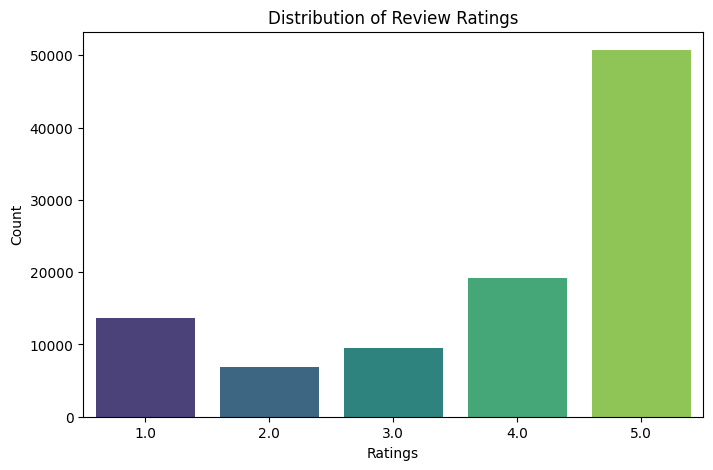

In [20]:
# distribution of review rating
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'overall' ratings
plt.figure(figsize=(8,5))
sns.countplot(x=df["overall"], palette="viridis")
plt.title("Distribution of Review Ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()


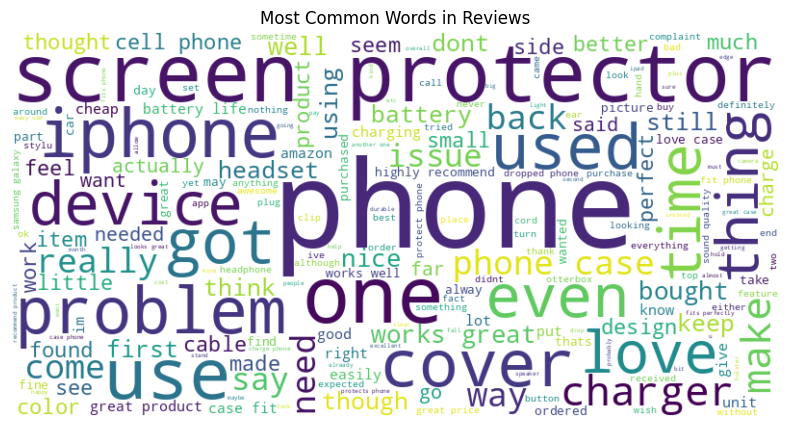

In [21]:
# word cloud for most common words
from wordcloud import WordCloud

# Combine all review text
text = " ".join(review for review in df["cleaned_reviewText"].dropna())

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display the Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()


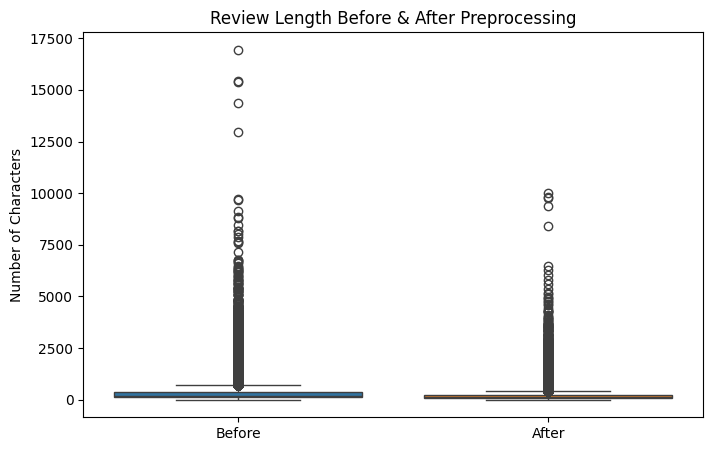

In [22]:
#Boxplot of Review Lengths (Before & After Cleaning)
df["review_length_before"] = df["reviewText"].dropna().apply(len)
df["review_length_after"] = df["cleaned_reviewText"].dropna().apply(len)

plt.figure(figsize=(8,5))
sns.boxplot(data=df[["review_length_before", "review_length_after"]])
plt.title("Review Length Before & After Preprocessing")
plt.ylabel("Number of Characters")
plt.xticks(ticks=[0,1], labels=["Before", "After"])
plt.show()


<ipython-input-23-18b7fd18a870>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["class"], palette="coolwarm")


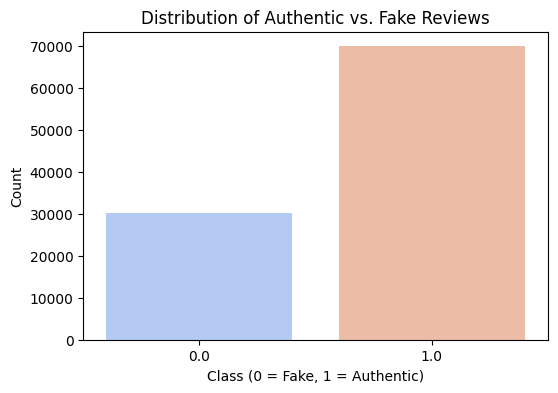

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x=df["class"], palette="coolwarm")
plt.title("Distribution of Authentic vs. Fake Reviews")
plt.xlabel("Class (0 = Fake, 1 = Authentic)")
plt.ylabel("Count")
plt.show()

# Model Training

In [24]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split
import numpy as np
from transformers import BertModel, BertTokenizer, BertConfig
import torch.optim as optim
from sklearn.metrics import accuracy_score
from tqdm import tqdm


In [25]:
# Convert bert_tokens (list of lists) to tensor
input_ids = torch.tensor(df["bert_tokens"].tolist(), dtype=torch.long)

# Generate attention masks (1s for real tokens, 0s for padding)
attention_masks = (input_ids != 0).long()

# Convert labels
labels = torch.tensor(df["class"].tolist(), dtype=torch.long)


<ipython-input-25-ec5e94146280>:2: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  input_ids = torch.tensor(df["bert_tokens"].tolist(), dtype=torch.long)


In [26]:
# Create a TensorDataset
dataset = TensorDataset(input_ids, attention_masks, labels)

# Split into train and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# DataLoaders
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)


In [27]:
from transformers import BertModel

class BERTClassifier(nn.Module):
    def __init__(self, dropout=0.3):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased")
        self.dropout = nn.Dropout(dropout)
        self.classifier = nn.Linear(self.bert.config.hidden_size, 2)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        dropped = self.dropout(pooled_output)
        return self.classifier(dropped)


In [28]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BERTClassifier().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=2e-5)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [29]:
epochs = 15

for epoch in range(epochs):
    model.train()
    total_loss = 0
    print(f"\nEpoch {epoch+1}/{epochs}")

for batch_idx, batch in enumerate(tqdm(train_dataloader, desc="Training")):
    b_input_ids, b_attention_mask, b_labels = [t.to(device) for t in batch]

    optimizer.zero_grad()
    outputs = model(b_input_ids, b_attention_mask)
    loss = criterion(outputs, b_labels)
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

    if batch_idx % 50 == 0:
        print(f"Batch {batch_idx} | Loss: {loss.item():.4f}")




Epoch 1/15

Epoch 2/15

Epoch 3/15

Epoch 4/15

Epoch 5/15

Epoch 6/15

Epoch 7/15

Epoch 8/15

Epoch 9/15

Epoch 10/15

Epoch 11/15

Epoch 12/15

Epoch 13/15

Epoch 14/15

Epoch 15/15


Training:   0%|          | 1/10000 [00:01<4:39:57,  1.68s/it]

Batch 0 | Loss: 0.7760


Training:   1%|          | 51/10000 [00:34<1:49:03,  1.52it/s]

Batch 50 | Loss: 0.6446


Training:   1%|          | 101/10000 [01:07<1:52:04,  1.47it/s]

Batch 100 | Loss: 0.5508


Training:   2%|▏         | 151/10000 [01:41<1:54:18,  1.44it/s]

Batch 150 | Loss: 0.3108


Training:   2%|▏         | 201/10000 [02:17<1:55:59,  1.41it/s]

Batch 200 | Loss: 0.3304


Training:   3%|▎         | 251/10000 [02:53<1:57:23,  1.38it/s]

Batch 250 | Loss: 0.3890


Training:   3%|▎         | 301/10000 [03:29<1:58:18,  1.37it/s]

Batch 300 | Loss: 0.4202


Training:   4%|▎         | 351/10000 [04:06<1:57:29,  1.37it/s]

Batch 350 | Loss: 0.2351


Training:   4%|▍         | 401/10000 [04:42<1:56:38,  1.37it/s]

Batch 400 | Loss: 0.2458


Training:   5%|▍         | 451/10000 [05:19<1:56:25,  1.37it/s]

Batch 450 | Loss: 0.5431


Training:   5%|▌         | 501/10000 [05:55<1:55:33,  1.37it/s]

Batch 500 | Loss: 0.4824


Training:   6%|▌         | 551/10000 [06:32<1:55:59,  1.36it/s]

Batch 550 | Loss: 0.2630


Training:   6%|▌         | 601/10000 [07:09<1:54:28,  1.37it/s]

Batch 600 | Loss: 0.4013


Training:   7%|▋         | 651/10000 [07:46<1:53:44,  1.37it/s]

Batch 650 | Loss: 0.5973


Training:   7%|▋         | 701/10000 [08:22<1:53:14,  1.37it/s]

Batch 700 | Loss: 0.3454


Training:   8%|▊         | 751/10000 [08:59<1:53:00,  1.36it/s]

Batch 750 | Loss: 0.7118


Training:   8%|▊         | 801/10000 [09:35<1:51:39,  1.37it/s]

Batch 800 | Loss: 0.3824


Training:   9%|▊         | 851/10000 [10:12<1:52:16,  1.36it/s]

Batch 850 | Loss: 0.5393


Training:   9%|▉         | 901/10000 [10:48<1:51:03,  1.37it/s]

Batch 900 | Loss: 0.8630


Training:  10%|▉         | 951/10000 [11:25<1:50:01,  1.37it/s]

Batch 950 | Loss: 0.3485


Training:  10%|█         | 1001/10000 [12:02<1:50:23,  1.36it/s]

Batch 1000 | Loss: 0.4401


Training:  11%|█         | 1051/10000 [12:38<1:49:46,  1.36it/s]

Batch 1050 | Loss: 0.5615


Training:  11%|█         | 1101/10000 [13:15<1:48:58,  1.36it/s]

Batch 1100 | Loss: 0.2441


Training:  12%|█▏        | 1151/10000 [13:52<1:48:21,  1.36it/s]

Batch 1150 | Loss: 0.1760


Training:  12%|█▏        | 1201/10000 [14:28<1:47:21,  1.37it/s]

Batch 1200 | Loss: 0.4476


Training:  13%|█▎        | 1251/10000 [15:05<1:46:25,  1.37it/s]

Batch 1250 | Loss: 0.4757


Training:  13%|█▎        | 1301/10000 [15:42<1:45:34,  1.37it/s]

Batch 1300 | Loss: 0.1752


Training:  14%|█▎        | 1351/10000 [16:18<1:45:28,  1.37it/s]

Batch 1350 | Loss: 0.4948


Training:  14%|█▍        | 1401/10000 [16:55<1:44:32,  1.37it/s]

Batch 1400 | Loss: 0.1172


Training:  15%|█▍        | 1451/10000 [17:32<1:44:02,  1.37it/s]

Batch 1450 | Loss: 0.5087


Training:  15%|█▌        | 1501/10000 [18:08<1:43:55,  1.36it/s]

Batch 1500 | Loss: 0.7367


Training:  16%|█▌        | 1551/10000 [18:45<1:43:27,  1.36it/s]

Batch 1550 | Loss: 0.2267


Training:  16%|█▌        | 1601/10000 [19:21<1:42:41,  1.36it/s]

Batch 1600 | Loss: 0.5269


Training:  17%|█▋        | 1651/10000 [19:58<1:42:27,  1.36it/s]

Batch 1650 | Loss: 1.1879


Training:  17%|█▋        | 1701/10000 [20:35<1:41:31,  1.36it/s]

Batch 1700 | Loss: 0.3783


Training:  18%|█▊        | 1751/10000 [21:11<1:41:04,  1.36it/s]

Batch 1750 | Loss: 0.6963


Training:  18%|█▊        | 1801/10000 [21:48<1:40:14,  1.36it/s]

Batch 1800 | Loss: 0.3714


Training:  19%|█▊        | 1851/10000 [22:24<1:39:28,  1.37it/s]

Batch 1850 | Loss: 0.2972


Training:  19%|█▉        | 1901/10000 [23:01<1:38:42,  1.37it/s]

Batch 1900 | Loss: 1.0323


Training:  20%|█▉        | 1951/10000 [23:38<1:38:33,  1.36it/s]

Batch 1950 | Loss: 0.0952


Training:  20%|██        | 2001/10000 [24:14<1:37:22,  1.37it/s]

Batch 2000 | Loss: 0.1812


Training:  21%|██        | 2051/10000 [24:51<1:37:16,  1.36it/s]

Batch 2050 | Loss: 0.1028


Training:  21%|██        | 2101/10000 [25:28<1:36:24,  1.37it/s]

Batch 2100 | Loss: 0.3819


Training:  22%|██▏       | 2151/10000 [26:04<1:36:02,  1.36it/s]

Batch 2150 | Loss: 0.1644


Training:  22%|██▏       | 2201/10000 [26:41<1:34:44,  1.37it/s]

Batch 2200 | Loss: 0.1268


Training:  23%|██▎       | 2251/10000 [27:17<1:34:32,  1.37it/s]

Batch 2250 | Loss: 0.0864


Training:  23%|██▎       | 2301/10000 [27:54<1:34:09,  1.36it/s]

Batch 2300 | Loss: 0.2966


Training:  24%|██▎       | 2351/10000 [28:31<1:33:16,  1.37it/s]

Batch 2350 | Loss: 0.3054


Training:  24%|██▍       | 2401/10000 [29:07<1:33:01,  1.36it/s]

Batch 2400 | Loss: 0.2539


Training:  25%|██▍       | 2451/10000 [29:44<1:31:46,  1.37it/s]

Batch 2450 | Loss: 0.0451


Training:  25%|██▌       | 2501/10000 [30:21<1:31:10,  1.37it/s]

Batch 2500 | Loss: 0.5620


Training:  26%|██▌       | 2551/10000 [30:57<1:30:28,  1.37it/s]

Batch 2550 | Loss: 0.2246


Training:  26%|██▌       | 2601/10000 [31:34<1:29:54,  1.37it/s]

Batch 2600 | Loss: 0.2422


Training:  27%|██▋       | 2651/10000 [32:10<1:29:26,  1.37it/s]

Batch 2650 | Loss: 0.3827


Training:  27%|██▋       | 2701/10000 [32:47<1:29:22,  1.36it/s]

Batch 2700 | Loss: 0.1964


Training:  28%|██▊       | 2751/10000 [33:23<1:28:42,  1.36it/s]

Batch 2750 | Loss: 0.9348


Training:  28%|██▊       | 2801/10000 [34:00<1:27:28,  1.37it/s]

Batch 2800 | Loss: 0.2880


Training:  29%|██▊       | 2851/10000 [34:36<1:26:52,  1.37it/s]

Batch 2850 | Loss: 0.3211


Training:  29%|██▉       | 2901/10000 [35:13<1:26:15,  1.37it/s]

Batch 2900 | Loss: 0.1767


Training:  30%|██▉       | 2951/10000 [35:49<1:25:42,  1.37it/s]

Batch 2950 | Loss: 0.1543


Training:  30%|███       | 3001/10000 [36:26<1:25:36,  1.36it/s]

Batch 3000 | Loss: 0.2110


Training:  31%|███       | 3051/10000 [37:03<1:24:52,  1.36it/s]

Batch 3050 | Loss: 0.5882


Training:  31%|███       | 3101/10000 [37:39<1:24:06,  1.37it/s]

Batch 3100 | Loss: 0.2231


Training:  32%|███▏      | 3151/10000 [38:16<1:23:50,  1.36it/s]

Batch 3150 | Loss: 0.0873


Training:  32%|███▏      | 3201/10000 [38:52<1:23:07,  1.36it/s]

Batch 3200 | Loss: 0.1767


Training:  33%|███▎      | 3251/10000 [39:29<1:22:44,  1.36it/s]

Batch 3250 | Loss: 0.4728


Training:  33%|███▎      | 3301/10000 [40:05<1:21:59,  1.36it/s]

Batch 3300 | Loss: 0.2558


Training:  34%|███▎      | 3351/10000 [40:42<1:21:33,  1.36it/s]

Batch 3350 | Loss: 0.3471


Training:  34%|███▍      | 3401/10000 [41:19<1:20:30,  1.37it/s]

Batch 3400 | Loss: 0.2069


Training:  35%|███▍      | 3451/10000 [41:55<1:20:12,  1.36it/s]

Batch 3450 | Loss: 0.4243


Training:  35%|███▌      | 3501/10000 [42:32<1:19:33,  1.36it/s]

Batch 3500 | Loss: 0.0694


Training:  36%|███▌      | 3551/10000 [43:09<1:18:31,  1.37it/s]

Batch 3550 | Loss: 0.2935


Training:  36%|███▌      | 3601/10000 [43:45<1:18:16,  1.36it/s]

Batch 3600 | Loss: 0.2079


Training:  37%|███▋      | 3651/10000 [44:22<1:17:03,  1.37it/s]

Batch 3650 | Loss: 0.3532


Training:  37%|███▋      | 3701/10000 [44:58<1:16:59,  1.36it/s]

Batch 3700 | Loss: 0.6110


Training:  38%|███▊      | 3751/10000 [45:35<1:15:52,  1.37it/s]

Batch 3750 | Loss: 1.0927


Training:  38%|███▊      | 3801/10000 [46:12<1:15:37,  1.37it/s]

Batch 3800 | Loss: 0.4388


Training:  39%|███▊      | 3851/10000 [46:48<1:14:49,  1.37it/s]

Batch 3850 | Loss: 0.7266


Training:  39%|███▉      | 3901/10000 [47:25<1:14:05,  1.37it/s]

Batch 3900 | Loss: 0.1688


Training:  40%|███▉      | 3951/10000 [48:01<1:13:42,  1.37it/s]

Batch 3950 | Loss: 0.0477


Training:  40%|████      | 4001/10000 [48:38<1:12:56,  1.37it/s]

Batch 4000 | Loss: 0.1190


Training:  41%|████      | 4051/10000 [49:15<1:12:15,  1.37it/s]

Batch 4050 | Loss: 0.0983


Training:  41%|████      | 4101/10000 [49:51<1:12:15,  1.36it/s]

Batch 4100 | Loss: 0.6697


Training:  42%|████▏     | 4151/10000 [50:28<1:11:54,  1.36it/s]

Batch 4150 | Loss: 0.1165


Training:  42%|████▏     | 4201/10000 [51:04<1:10:51,  1.36it/s]

Batch 4200 | Loss: 0.3981


Training:  43%|████▎     | 4251/10000 [51:41<1:10:15,  1.36it/s]

Batch 4250 | Loss: 0.1272


Training:  43%|████▎     | 4301/10000 [52:18<1:09:39,  1.36it/s]

Batch 4300 | Loss: 0.0873


Training:  44%|████▎     | 4351/10000 [52:54<1:09:02,  1.36it/s]

Batch 4350 | Loss: 0.6054


Training:  44%|████▍     | 4401/10000 [53:31<1:08:02,  1.37it/s]

Batch 4400 | Loss: 0.4465


Training:  45%|████▍     | 4451/10000 [54:07<1:07:25,  1.37it/s]

Batch 4450 | Loss: 0.0893


Training:  45%|████▌     | 4501/10000 [54:44<1:06:47,  1.37it/s]

Batch 4500 | Loss: 0.6522


Training:  46%|████▌     | 4551/10000 [55:21<1:06:20,  1.37it/s]

Batch 4550 | Loss: 0.1886


Training:  46%|████▌     | 4601/10000 [55:57<1:05:50,  1.37it/s]

Batch 4600 | Loss: 0.4779


Training:  47%|████▋     | 4651/10000 [56:34<1:05:00,  1.37it/s]

Batch 4650 | Loss: 0.3654


Training:  47%|████▋     | 4701/10000 [57:11<1:04:47,  1.36it/s]

Batch 4700 | Loss: 0.1778


Training:  48%|████▊     | 4751/10000 [57:47<1:04:16,  1.36it/s]

Batch 4750 | Loss: 0.1954


Training:  48%|████▊     | 4801/10000 [58:24<1:03:39,  1.36it/s]

Batch 4800 | Loss: 0.3105


Training:  49%|████▊     | 4851/10000 [59:01<1:02:33,  1.37it/s]

Batch 4850 | Loss: 0.8166


Training:  49%|████▉     | 4901/10000 [59:37<1:02:12,  1.37it/s]

Batch 4900 | Loss: 0.1756


Training:  50%|████▉     | 4951/10000 [1:00:14<1:01:24,  1.37it/s]

Batch 4950 | Loss: 0.2171


Training:  50%|█████     | 5001/10000 [1:00:50<1:00:47,  1.37it/s]

Batch 5000 | Loss: 0.0972


Training:  51%|█████     | 5051/10000 [1:01:27<1:00:38,  1.36it/s]

Batch 5050 | Loss: 0.0814


Training:  51%|█████     | 5101/10000 [1:02:04<1:00:01,  1.36it/s]

Batch 5100 | Loss: 0.1596


Training:  52%|█████▏    | 5151/10000 [1:02:40<59:20,  1.36it/s]

Batch 5150 | Loss: 0.6865


Training:  52%|█████▏    | 5201/10000 [1:03:17<58:27,  1.37it/s]

Batch 5200 | Loss: 0.2016


Training:  53%|█████▎    | 5251/10000 [1:03:53<57:59,  1.36it/s]

Batch 5250 | Loss: 0.0875


Training:  53%|█████▎    | 5301/10000 [1:04:30<57:48,  1.35it/s]

Batch 5300 | Loss: 0.1114


Training:  54%|█████▎    | 5351/10000 [1:05:07<56:57,  1.36it/s]

Batch 5350 | Loss: 0.2959


Training:  54%|█████▍    | 5401/10000 [1:05:43<56:25,  1.36it/s]

Batch 5400 | Loss: 0.4323


Training:  55%|█████▍    | 5451/10000 [1:06:20<55:44,  1.36it/s]

Batch 5450 | Loss: 0.5681


Training:  55%|█████▌    | 5501/10000 [1:06:57<54:40,  1.37it/s]

Batch 5500 | Loss: 0.3056


Training:  56%|█████▌    | 5551/10000 [1:07:33<54:32,  1.36it/s]

Batch 5550 | Loss: 0.1195


Training:  56%|█████▌    | 5601/10000 [1:08:10<53:41,  1.37it/s]

Batch 5600 | Loss: 0.4439


Training:  57%|█████▋    | 5651/10000 [1:08:47<53:28,  1.36it/s]

Batch 5650 | Loss: 0.1023


Training:  57%|█████▋    | 5701/10000 [1:09:23<52:44,  1.36it/s]

Batch 5700 | Loss: 0.0712


Training:  58%|█████▊    | 5751/10000 [1:10:00<52:09,  1.36it/s]

Batch 5750 | Loss: 0.4571


Training:  58%|█████▊    | 5801/10000 [1:10:37<51:00,  1.37it/s]

Batch 5800 | Loss: 0.0980


Training:  59%|█████▊    | 5851/10000 [1:11:13<50:39,  1.37it/s]

Batch 5850 | Loss: 0.3272


Training:  59%|█████▉    | 5901/10000 [1:11:50<49:52,  1.37it/s]

Batch 5900 | Loss: 0.3759


Training:  60%|█████▉    | 5951/10000 [1:12:26<49:27,  1.36it/s]

Batch 5950 | Loss: 0.5269


Training:  60%|██████    | 6001/10000 [1:13:03<48:47,  1.37it/s]

Batch 6000 | Loss: 0.3730


Training:  61%|██████    | 6051/10000 [1:13:40<48:23,  1.36it/s]

Batch 6050 | Loss: 0.1554


Training:  61%|██████    | 6101/10000 [1:14:16<47:30,  1.37it/s]

Batch 6100 | Loss: 0.0462


Training:  62%|██████▏   | 6151/10000 [1:14:53<46:42,  1.37it/s]

Batch 6150 | Loss: 0.3400


Training:  62%|██████▏   | 6201/10000 [1:15:29<46:34,  1.36it/s]

Batch 6200 | Loss: 0.7507


Training:  63%|██████▎   | 6251/10000 [1:16:06<45:37,  1.37it/s]

Batch 6250 | Loss: 0.2060


Training:  63%|██████▎   | 6301/10000 [1:16:43<45:11,  1.36it/s]

Batch 6300 | Loss: 0.0384


Training:  64%|██████▎   | 6351/10000 [1:17:19<44:39,  1.36it/s]

Batch 6350 | Loss: 0.0353


Training:  64%|██████▍   | 6401/10000 [1:17:56<43:51,  1.37it/s]

Batch 6400 | Loss: 0.1597


Training:  65%|██████▍   | 6451/10000 [1:18:32<43:25,  1.36it/s]

Batch 6450 | Loss: 0.3771


Training:  65%|██████▌   | 6501/10000 [1:19:09<42:37,  1.37it/s]

Batch 6500 | Loss: 0.4592


Training:  66%|██████▌   | 6551/10000 [1:19:46<41:56,  1.37it/s]

Batch 6550 | Loss: 0.5255


Training:  66%|██████▌   | 6601/10000 [1:20:22<41:19,  1.37it/s]

Batch 6600 | Loss: 0.1707


Training:  67%|██████▋   | 6651/10000 [1:20:59<41:00,  1.36it/s]

Batch 6650 | Loss: 0.6683


Training:  67%|██████▋   | 6701/10000 [1:21:35<40:06,  1.37it/s]

Batch 6700 | Loss: 0.2251


Training:  68%|██████▊   | 6751/10000 [1:22:12<39:41,  1.36it/s]

Batch 6750 | Loss: 0.3712


Training:  68%|██████▊   | 6801/10000 [1:22:49<38:52,  1.37it/s]

Batch 6800 | Loss: 0.1697


Training:  69%|██████▊   | 6851/10000 [1:23:25<38:16,  1.37it/s]

Batch 6850 | Loss: 0.2492


Training:  69%|██████▉   | 6901/10000 [1:24:02<37:55,  1.36it/s]

Batch 6900 | Loss: 0.0355


Training:  70%|██████▉   | 6951/10000 [1:24:38<37:26,  1.36it/s]

Batch 6950 | Loss: 0.0688


Training:  70%|███████   | 7001/10000 [1:25:15<36:44,  1.36it/s]

Batch 7000 | Loss: 0.2118


Training:  71%|███████   | 7051/10000 [1:25:52<36:08,  1.36it/s]

Batch 7050 | Loss: 1.1882


Training:  71%|███████   | 7101/10000 [1:26:28<35:25,  1.36it/s]

Batch 7100 | Loss: 0.3306


Training:  72%|███████▏  | 7151/10000 [1:27:05<34:47,  1.37it/s]

Batch 7150 | Loss: 0.1320


Training:  72%|███████▏  | 7201/10000 [1:27:42<34:21,  1.36it/s]

Batch 7200 | Loss: 0.1256


Training:  73%|███████▎  | 7251/10000 [1:28:18<33:25,  1.37it/s]

Batch 7250 | Loss: 0.4683


Training:  73%|███████▎  | 7301/10000 [1:28:55<32:58,  1.36it/s]

Batch 7300 | Loss: 0.4992


Training:  74%|███████▎  | 7351/10000 [1:29:31<32:25,  1.36it/s]

Batch 7350 | Loss: 0.5694


Training:  74%|███████▍  | 7401/10000 [1:30:08<31:49,  1.36it/s]

Batch 7400 | Loss: 0.1875


Training:  75%|███████▍  | 7451/10000 [1:30:45<31:01,  1.37it/s]

Batch 7450 | Loss: 0.8474


Training:  75%|███████▌  | 7501/10000 [1:31:21<30:33,  1.36it/s]

Batch 7500 | Loss: 0.6342


Training:  76%|███████▌  | 7551/10000 [1:31:58<29:44,  1.37it/s]

Batch 7550 | Loss: 0.5589


Training:  76%|███████▌  | 7601/10000 [1:32:34<29:13,  1.37it/s]

Batch 7600 | Loss: 1.0551


Training:  77%|███████▋  | 7651/10000 [1:33:11<28:50,  1.36it/s]

Batch 7650 | Loss: 0.6785


Training:  77%|███████▋  | 7701/10000 [1:33:47<28:08,  1.36it/s]

Batch 7700 | Loss: 0.3723


Training:  78%|███████▊  | 7751/10000 [1:34:24<27:23,  1.37it/s]

Batch 7750 | Loss: 0.0897


Training:  78%|███████▊  | 7801/10000 [1:35:01<26:46,  1.37it/s]

Batch 7800 | Loss: 0.2669


Training:  79%|███████▊  | 7851/10000 [1:35:37<26:09,  1.37it/s]

Batch 7850 | Loss: 0.2381


Training:  79%|███████▉  | 7901/10000 [1:36:14<25:35,  1.37it/s]

Batch 7900 | Loss: 0.5345


Training:  80%|███████▉  | 7951/10000 [1:36:51<25:06,  1.36it/s]

Batch 7950 | Loss: 0.1632


Training:  80%|████████  | 8001/10000 [1:37:27<24:31,  1.36it/s]

Batch 8000 | Loss: 0.0175


Training:  81%|████████  | 8051/10000 [1:38:04<23:41,  1.37it/s]

Batch 8050 | Loss: 0.3516


Training:  81%|████████  | 8101/10000 [1:38:40<23:04,  1.37it/s]

Batch 8100 | Loss: 0.1540


Training:  82%|████████▏ | 8151/10000 [1:39:17<22:29,  1.37it/s]

Batch 8150 | Loss: 0.0817


Training:  82%|████████▏ | 8201/10000 [1:39:53<21:57,  1.37it/s]

Batch 8200 | Loss: 0.1908


Training:  83%|████████▎ | 8251/10000 [1:40:30<21:16,  1.37it/s]

Batch 8250 | Loss: 0.4002


Training:  83%|████████▎ | 8301/10000 [1:41:07<20:39,  1.37it/s]

Batch 8300 | Loss: 0.2464


Training:  84%|████████▎ | 8351/10000 [1:41:43<20:02,  1.37it/s]

Batch 8350 | Loss: 0.4817


Training:  84%|████████▍ | 8401/10000 [1:42:20<19:27,  1.37it/s]

Batch 8400 | Loss: 0.4205


Training:  85%|████████▍ | 8451/10000 [1:42:56<18:50,  1.37it/s]

Batch 8450 | Loss: 0.2413


Training:  85%|████████▌ | 8501/10000 [1:43:33<18:16,  1.37it/s]

Batch 8500 | Loss: 0.0519


Training:  86%|████████▌ | 8551/10000 [1:44:10<17:43,  1.36it/s]

Batch 8550 | Loss: 0.5288


Training:  86%|████████▌ | 8601/10000 [1:44:46<17:03,  1.37it/s]

Batch 8600 | Loss: 0.3388


Training:  87%|████████▋ | 8651/10000 [1:45:23<16:24,  1.37it/s]

Batch 8650 | Loss: 0.0645


Training:  87%|████████▋ | 8701/10000 [1:45:59<15:48,  1.37it/s]

Batch 8700 | Loss: 0.2052


Training:  88%|████████▊ | 8751/10000 [1:46:36<15:11,  1.37it/s]

Batch 8750 | Loss: 0.1917


Training:  88%|████████▊ | 8801/10000 [1:47:13<14:36,  1.37it/s]

Batch 8800 | Loss: 0.2766


Training:  89%|████████▊ | 8851/10000 [1:47:49<14:05,  1.36it/s]

Batch 8850 | Loss: 0.1574


Training:  89%|████████▉ | 8901/10000 [1:48:26<13:21,  1.37it/s]

Batch 8900 | Loss: 0.2292


Training:  90%|████████▉ | 8951/10000 [1:49:02<12:44,  1.37it/s]

Batch 8950 | Loss: 0.2070


Training:  90%|█████████ | 9001/10000 [1:49:39<12:11,  1.37it/s]

Batch 9000 | Loss: 0.1353


Training:  91%|█████████ | 9051/10000 [1:50:16<11:36,  1.36it/s]

Batch 9050 | Loss: 0.4649


Training:  91%|█████████ | 9101/10000 [1:50:52<10:57,  1.37it/s]

Batch 9100 | Loss: 0.4273


Training:  92%|█████████▏| 9151/10000 [1:51:29<10:22,  1.36it/s]

Batch 9150 | Loss: 0.3643


Training:  92%|█████████▏| 9201/10000 [1:52:05<09:46,  1.36it/s]

Batch 9200 | Loss: 0.3796


Training:  93%|█████████▎| 9251/10000 [1:52:42<09:10,  1.36it/s]

Batch 9250 | Loss: 0.3003


Training:  93%|█████████▎| 9301/10000 [1:53:18<08:30,  1.37it/s]

Batch 9300 | Loss: 0.2974


Training:  94%|█████████▎| 9351/10000 [1:53:55<07:58,  1.36it/s]

Batch 9350 | Loss: 0.1423


Training:  94%|█████████▍| 9401/10000 [1:54:32<07:20,  1.36it/s]

Batch 9400 | Loss: 0.1676


Training:  95%|█████████▍| 9451/10000 [1:55:08<06:43,  1.36it/s]

Batch 9450 | Loss: 0.7733


Training:  95%|█████████▌| 9501/10000 [1:55:45<06:06,  1.36it/s]

Batch 9500 | Loss: 0.3548


Training:  96%|█████████▌| 9551/10000 [1:56:21<05:27,  1.37it/s]

Batch 9550 | Loss: 0.0295


Training:  96%|█████████▌| 9601/10000 [1:56:58<04:52,  1.36it/s]

Batch 9600 | Loss: 0.2010


Training:  97%|█████████▋| 9651/10000 [1:57:34<04:15,  1.37it/s]

Batch 9650 | Loss: 0.0610


Training:  97%|█████████▋| 9701/10000 [1:58:11<03:38,  1.37it/s]

Batch 9700 | Loss: 0.0966


Training:  98%|█████████▊| 9751/10000 [1:58:48<03:03,  1.36it/s]

Batch 9750 | Loss: 0.0480


Training:  98%|█████████▊| 9801/10000 [1:59:24<02:25,  1.36it/s]

Batch 9800 | Loss: 0.2735


Training:  99%|█████████▊| 9851/10000 [2:00:01<01:49,  1.36it/s]

Batch 9850 | Loss: 0.1719


Training:  99%|█████████▉| 9901/10000 [2:00:37<01:12,  1.37it/s]

Batch 9900 | Loss: 0.2322


Training: 100%|█████████▉| 9951/10000 [2:01:14<00:35,  1.37it/s]

Batch 9950 | Loss: 0.3965


Training: 100%|██████████| 10000/10000 [2:01:50<00:00,  1.37it/s]


In [30]:
torch.save(model.state_dict(), f"bert_epoch{epoch+1}.pth")

In [31]:
model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in tqdm(val_dataloader, desc="Validating"):
        b_input_ids, b_attention_mask, b_labels = [t.to(device) for t in batch]
        outputs = model(b_input_ids, b_attention_mask)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(b_labels.cpu().numpy())

accuracy = accuracy_score(all_labels, all_preds)
print(f"Validation Accuracy: {accuracy:.4f}")


Validating: 100%|██████████| 2500/2500 [09:57<00:00,  4.19it/s]

Validation Accuracy: 0.8897


In [32]:
torch.save(model.state_dict(), "bert_classifier.pth")
print("✅ Model saved as 'bert_classifier.pth'")


✅ Model saved as 'bert_classifier.pth'


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

model.eval()
all_preds, all_labels = [], []

with torch.no_grad():
    for batch in tqdm(val_dataloader, desc="Evaluating"):
        b_input_ids, b_attention_mask, b_labels = [t.to(device) for t in batch]
        outputs = model(b_input_ids, b_attention_mask)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(b_labels.cpu().numpy())

y_true = np.array(all_labels)
y_pred = np.array(all_preds)

acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"✅ Validation Accuracy: {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall: {rec:.4f}")
print(f"✅ F1 Score: {f1:.4f}")

print("\n🔍 Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=["Fake", "Authentic"]))


Evaluating: 100%|██████████| 2500/2500 [09:58<00:00,  4.18it/s]

✅ Validation Accuracy: 0.8897
✅ Precision: 0.9000
✅ Recall: 0.9475
✅ F1 Score: 0.9231

🔍 Classification Report:

              precision    recall  f1-score   support

        Fake       0.86      0.76      0.80      6013
   Authentic       0.90      0.95      0.92     13987

    accuracy                           0.89     20000
   macro avg       0.88      0.85      0.86     20000
weighted avg       0.89      0.89      0.89     20000



In [34]:
model.load_state_dict(torch.load("bert_classifier.pth"))
model.eval()


BERTClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

all_preds, all_labels = [], []

with torch.no_grad():
    for batch in val_dataloader:
        input_ids, attention_mask, labels = [t.to(device) for t in batch]
        outputs = model(input_ids, attention_mask)
        preds = torch.argmax(outputs, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate metrics
acc = accuracy_score(all_labels, all_preds)
prec = precision_score(all_labels, all_preds)
rec = recall_score(all_labels, all_preds)
f1 = f1_score(all_labels, all_preds)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.8897
Precision: 0.9000
Recall: 0.9475
F1 Score: 0.9231


In [36]:
from transformers import BertTokenizer
import torch.nn.functional as F

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model.load_state_dict(torch.load("bert_classifier.pth"))
model.eval()

# Your custom review
review = "This product is amazing and exceeded my expectations!"

# Tokenize
inputs = tokenizer(review, return_tensors="pt", truncation=True, padding="max_length", max_length=128)

# Move to device
input_ids = inputs["input_ids"].to(device)
attention_mask = inputs["attention_mask"].to(device)

# Predict
with torch.no_grad():
    outputs = model(input_ids, attention_mask)
    probs = F.softmax(outputs, dim=1)
    pred = torch.argmax(probs, dim=1).item()

print("Predicted Label:", "Authentic" if pred == 1 else "Fake")


Predicted Label: Authentic


In [37]:
import torch.nn.functional as F

# List of manual reviews (both authentic and fake)
reviews = [
    "This product is amazing and exceeded my expectations!",
    "Terrible product. It broke after one use and is a waste of money.",
    "I love this product, it works perfectly every time.",
    "Fake review example: This product is the worst ever and totally useless."
]

# Tokenize the list of reviews
inputs = tokenizer(
    reviews,
    return_tensors="pt",
    truncation=True,
    padding="max_length",
    max_length=128  # adjust max_length as needed
)

# Move inputs to the same device as the model (GPU or CPU)
input_ids = inputs["input_ids"].to(device)
attention_mask = inputs["attention_mask"].to(device)

# Get model predictions
model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask)
    probabilities = F.softmax(outputs, dim=1)
    predictions = torch.argmax(probabilities, dim=1)

# Display the results
for review, pred in zip(reviews, predictions):
    label = "Authentic" if pred.item() == 1 else "Fake"
    print("Review:", review)
    print("Predicted Label:", label)
    print("-" * 60)


Review: This product is amazing and exceeded my expectations!
Predicted Label: Authentic
------------------------------------------------------------
Review: Terrible product. It broke after one use and is a waste of money.
Predicted Label: Fake
------------------------------------------------------------
Review: I love this product, it works perfectly every time.
Predicted Label: Authentic
------------------------------------------------------------
Review: Fake review example: This product is the worst ever and totally useless.
Predicted Label: Fake
------------------------------------------------------------


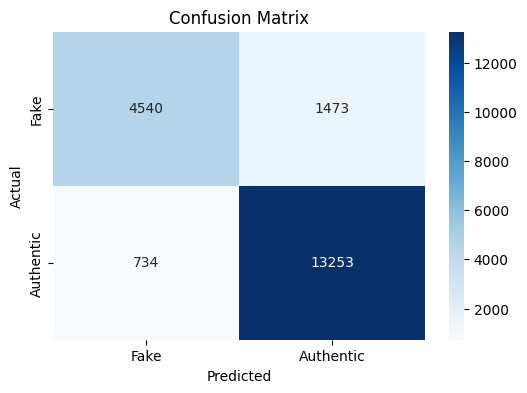

In [38]:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# y_true and y_pred should already be generated from the validation loop
# If not, use your validation predictions as shown before:
# y_true = all_labels
# y_pred = all_preds

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = ["Fake", "Authentic"]

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
